<a href="https://colab.research.google.com/github/ianxdxd/ML-Study/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Regression:
    def __init__(self, n_iter: int, l_rate: float):
        self.n_iter = n_iter
        self.l_rate = l_rate
        self.w = None

    def init_weights(self, n_features: float):
        # use [-1/n, +1/n] to initiliaze weights
        lim = 1 / np.sqrt(n_features)
        self.w = np.random.uniform(-lim, lim, n_features)

    def predict(self, X):
        return np.dot(X, self.w)

    def fit_gd(self, X, y):
        n_samples = X.shape[0]
        X = X.reshape(-1, 1)
        self.error = []
        self.init_weights(X.shape[1])

        for i in range(self.n_iter):
            y_pred = self.predict(X)
            error = y - y_pred
            self.error.append(np.mean(0.5 * ((error)**2)) + np.sum(np.abs(self.w)))
            grad_w = -2 * np.dot(X.T, error) / n_samples
            self.w -= self.l_rate * grad_w


    def fit_leastSquares(self, X, y):
        return 0

Final MSE:  3.5886245111026605


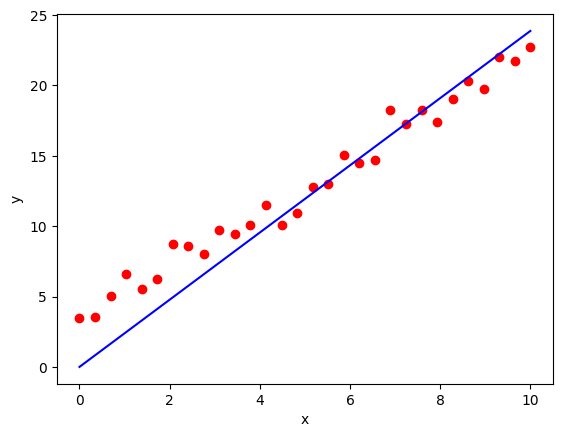

In [ ]:
np.random.seed(42)
# y = 2x + 3
X = np.linspace(0, 10, 30)
y = 2 * X + 3 + np.random.normal(0, 1, X.shape) # add noise to make it more realistic

reg = Regression(n_iter=1000, l_rate=0.01)
reg.fit_gd(X, y)
y_line = reg.predict(X.reshape(-1, 1))
final_mse = np.mean((y - y_line) ** 2)

print("Final MSE: ", final_mse)
plt.scatter(X, y, color='red')
plt.plot(X, y_line, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()